Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',200)
plt.style.use('ggplot')

from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud

import re

Loading and inspecting the data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/My Drive/DATASETS/twitter.csv'

In [4]:
df = pd.read_csv(path, encoding = 'ISO-8859-1', names = ['sentiment', 'id', 'date', 'query_string', 'user', 'text'])

In [5]:
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.shape

(1600000, 6)

In [7]:
df.columns

Index(['sentiment', 'id', 'date', 'query_string', 'user', 'text'], dtype='object')

In [8]:
df.dtypes

sentiment        int64
id               int64
date            object
query_string    object
user            object
text            object
dtype: object

In [9]:
df.describe()

,sentiment,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   sentiment     1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   date          1600000 non-null  object
 3   query_string  1600000 non-null  object
 4   user          1600000 non-null  object
 5   text          1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


Data Cleaning

In [11]:
df.isnull().sum()

sentiment       0
id              0
date            0
query_string    0
user            0
text            0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df["sentiment"].unique()

array([0, 4])

Data Visualization

<ipython-input-14-32955c658411>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="bright")


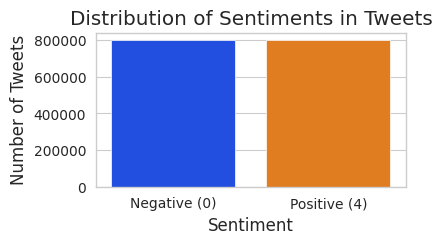

In [14]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Count the number of occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# Create a bar plot for sentiment distribution
plt.figure(figsize=(4, 2))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="bright")
plt.title('Distribution of Sentiments in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (4)'])  # 0 is negative, 4 is positive
plt.show()


<ipython-input-15-13b328dafa12>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='tweet_length', data=df, palette="coolwarm")


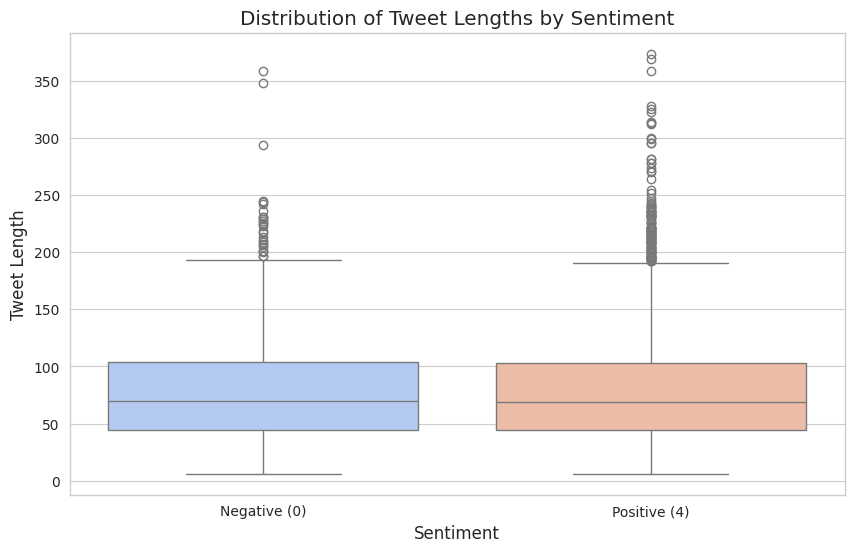

In [15]:
# Calculate the length of each tweet
df['tweet_length'] = df['text'].apply(len)

# Create a box plot to compare tweet lengths for different sentiments
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='tweet_length', data=df, palette="coolwarm")
plt.title('Distribution of Tweet Lengths by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (4)'])  # Adjusting labels for clarity
plt.show()


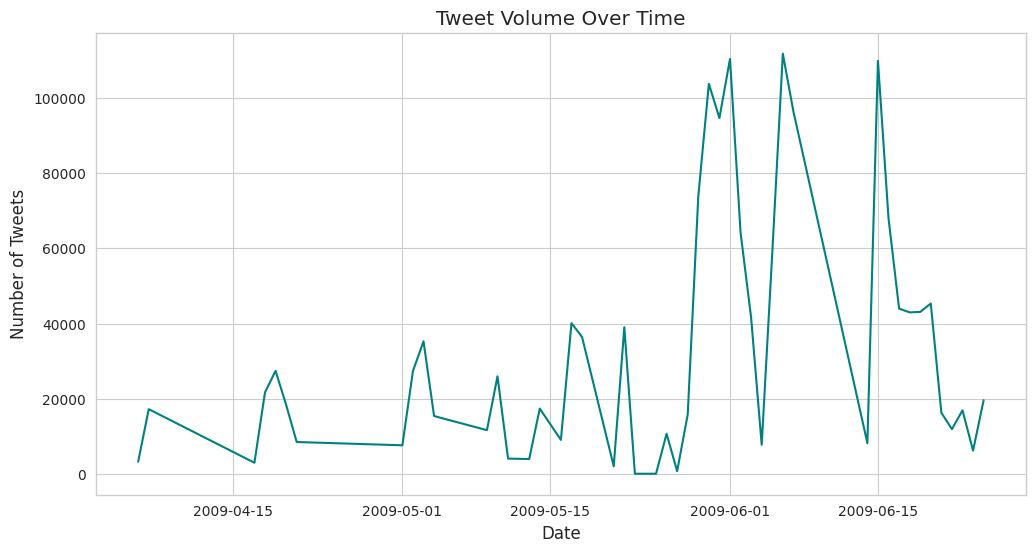

In [16]:
# Convert the 'date' column to datetime objects.
df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S PDT %Y')

# Group the tweets by date and count the number of tweets per day
tweets_per_day = df.groupby(df['date'].dt.date).size()

# Create a time series plot of tweet volume over time
plt.figure(figsize=(12, 6))
tweets_per_day.plot(kind='line', color='teal')
plt.title('Tweet Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()


Data Preprocessing

In [17]:
# Removing the unnecessary columns.
dataset = df[['sentiment','text']]


# Replace value 1 to Positive sentiment 4  (better for binary classification)
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

<ipython-input-17-10029c02c396>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['sentiment'] = dataset['sentiment'].replace(4,1)


In [18]:
dataset.sentiment.unique()

array([0, 1])

In [19]:
# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

In [20]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [21]:
# Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [22]:
def preprocess(textdata):
    processedText = []

    # Create Lemmatizer.
    wordLemm = WordNetLemmatizer()

    # Defining regex patterns.
    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern = '@[^\s]+'
    alphaPattern = "[^a-zA-Z0-9]"
    sequencePattern = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for tweet in textdata:
        tweet = tweet.lower()

        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern, ' URL', tweet)

        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, " EMOJI" + emojis[emoji])

        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern, ' USER', tweet)

        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)

        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is not a stopword and length is greater than 1.
            if word not in stopwordlist and len(word) > 1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word + ' ')

        processedText.append(tweetwords.strip())

    return processedText


In [23]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
processedtext = preprocess(text)

In [28]:
def remove_numbers_and_extra_spaces(text):
    """Remove digits and extra spaces from the given text."""
    # Remove digits
    text_without_numbers = re.sub(r'\d+', '', text)
    # Collapse multiple spaces into a single space
    cleaned_text = re.sub(r'\s+', ' ', text_without_numbers).strip()
    return cleaned_text

In [29]:
processedText = [remove_numbers_and_extra_spaces(item) for item in processedtext]

In [30]:
print(processedText[0:10])

['USER URL aww bummer shoulda got david carr third day EMOJIwink', 'upset update facebook texting might cry result school today also blah', 'USER dived many time ball managed save rest go bound', 'whole body feel itchy like fire', 'USER no not behaving mad see over', 'USER not whole crew', 'need hug', 'USER hey long time no see yes rain bit bit lol fine thanks', 'USER nope didn', 'USER que muera']


Cloud words for negative tweets

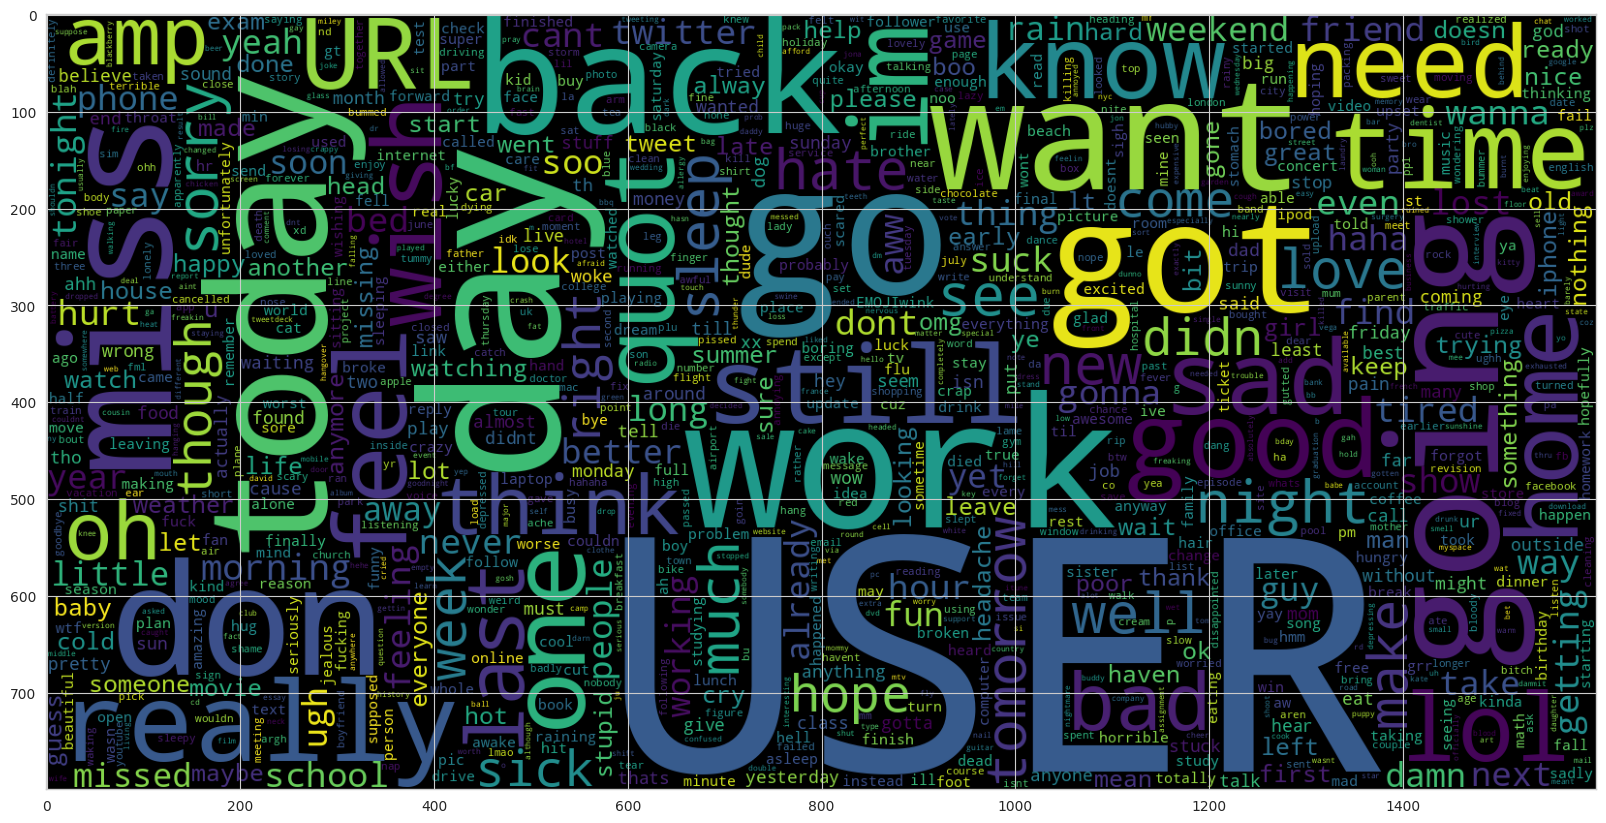

In [31]:
data_neg = processedText[:800000]
plt.figure(figsize=(20,20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

Cloud words for positive tweets

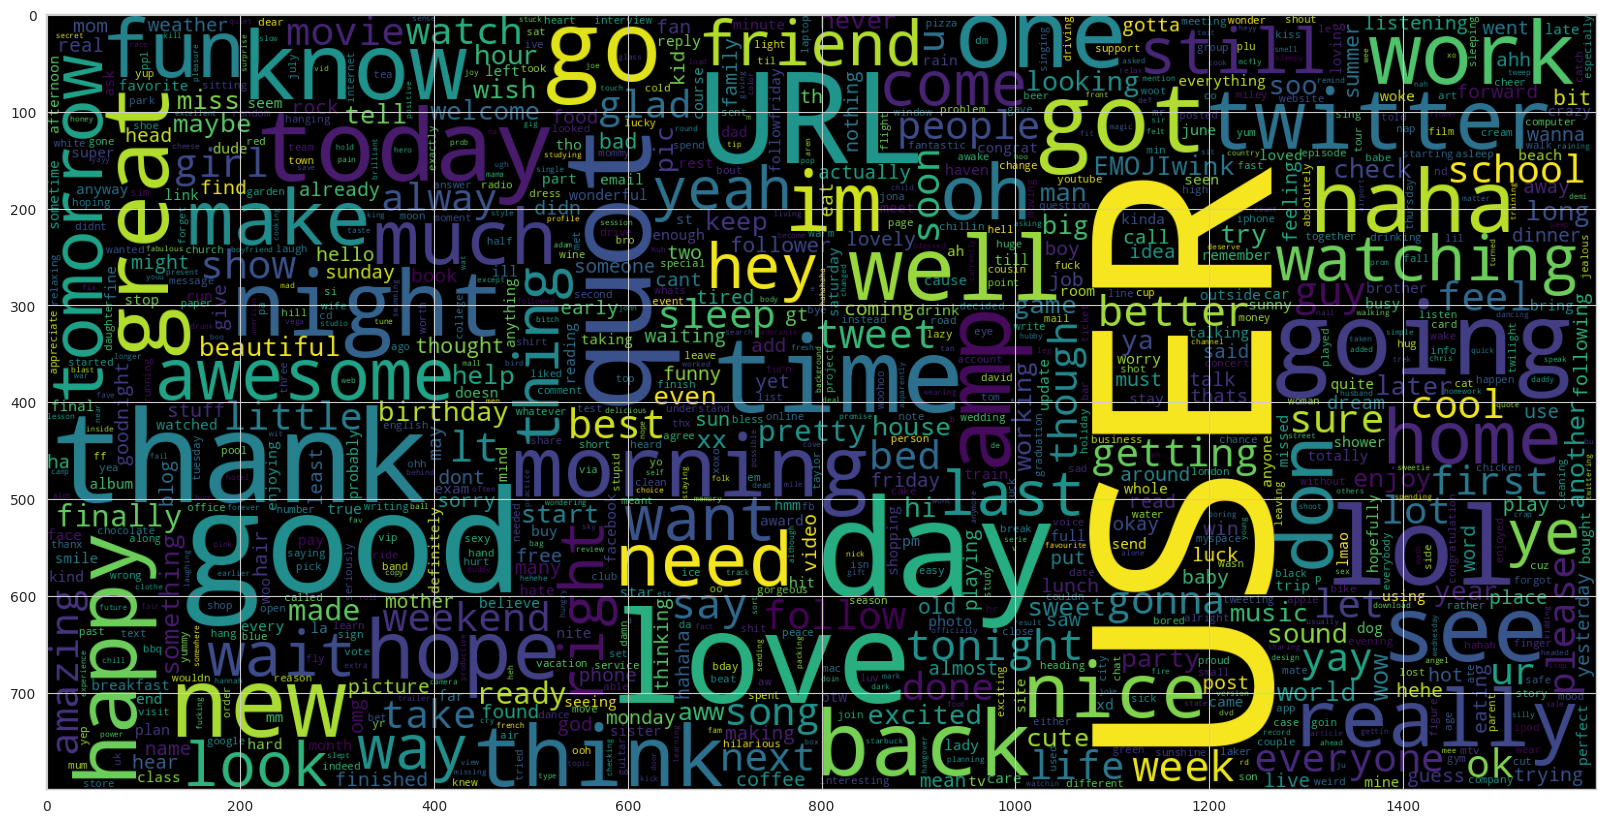

In [32]:
data_pos = processedText[800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

Splitting the data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(processedText, sentiment,
                                                    test_size = 0.1, random_state = 0)

Transforming the data using TF-IDF Vectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=50000)
vectorizer.fit(X_train)

TfidfVectorizer(max_features=50000, ngram_range=(1, 2))

In [37]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

Model Evaluation

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
def model_evaluate(model):
    y_pred = model.predict(X_test)

    # classification report
    print(classification_report(y_test, y_pred))

    # confusion report
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories = ['Negative', 'Positive']

    group_names = ['True Neg', 'False Pos','False Neg','True Pos']

    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'RdPu',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Model Building

In [40]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       0.79      0.78      0.79     79738
           1       0.79      0.80      0.79     80262

    accuracy                           0.79    160000
   macro avg       0.79      0.79      0.79    160000
weighted avg       0.79      0.79      0.79    160000



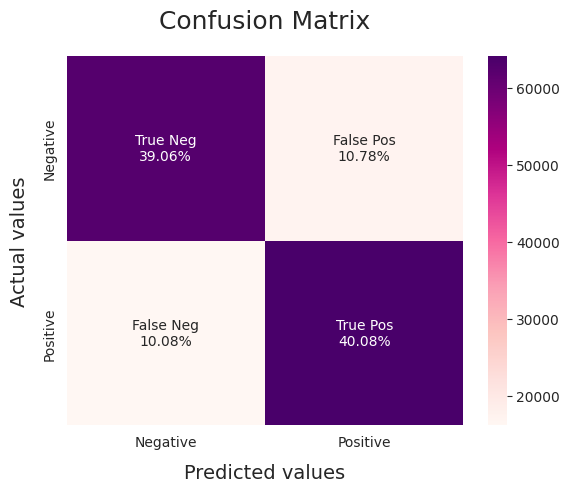

In [41]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_evaluate(BNBmodel)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80     79738
           1       0.80      0.83      0.81     80262

    accuracy                           0.81    160000
   macro avg       0.81      0.81      0.81    160000
weighted avg       0.81      0.81      0.81    160000



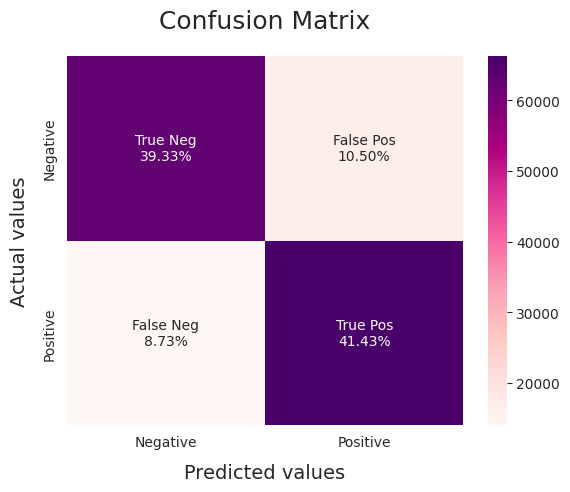

In [42]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_evaluate(SVCmodel)

              precision    recall  f1-score   support

           0       0.82      0.79      0.81     79738
           1       0.80      0.82      0.81     80262

    accuracy                           0.81    160000
   macro avg       0.81      0.81      0.81    160000
weighted avg       0.81      0.81      0.81    160000



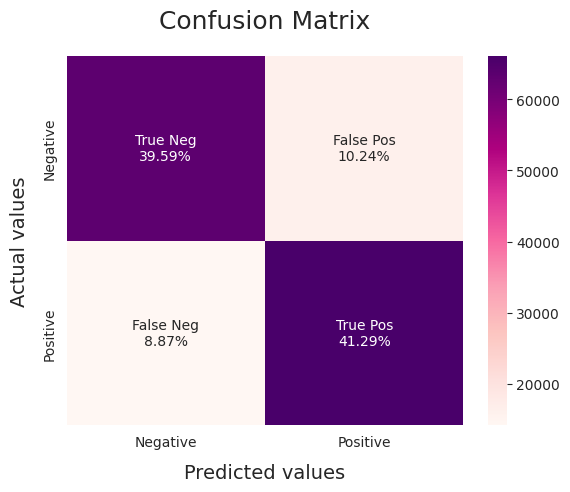

In [43]:
LRmodel = LogisticRegression(C =2, max_iter=1000, n_jobs=1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)